In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

from matplotlib import colors
# with this color norm we can do discrete scatter sensibly
# norm = colors.BoundaryNorm(boundaries=np.arange(11), ncolors=10)
def scatter_tab(x, y, c, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    ax.scatter(x, y, c=plt.cm.tab10(c), **kwargs)

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

(5, 2)
(100,)
(100,)


([], <a list of 0 Text major ticklabel objects>)

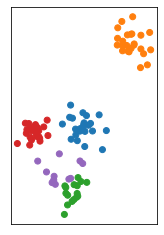

In [4]:
X, y = make_blobs(centers=4, random_state=1)

km = KMeans(n_clusters=5, random_state=0)
km.fit(X)
print(km.cluster_centers_.shape)
print(km.labels_.shape)
# predict is the same as labels_ on training data
# but can be applied to new data
print(km.predict(X).shape)
scatter_tab(X[:, 0], X[:, 1], c=km.labels_)
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

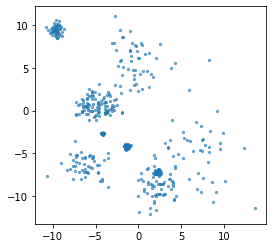

In [5]:
rng = np.random.RandomState(42)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

In [6]:
km = KMeans(n_clusters=5)
km.fit(X)
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = km.predict(np.c_[xx.ravel(), yy.ravel()])

([], <a list of 0 Text major ticklabel objects>)

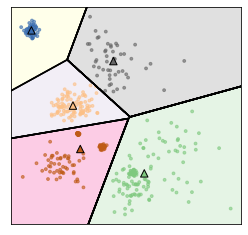

In [7]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=.2, cmap='Accent')
plt.contour(xx, yy, pred.reshape(xx.shape), colors='k')
plt.scatter(X[:, 0], X[:, 1], s=8, alpha=.6, c=km.labels_, cmap='Accent')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=55, cmap='Accent', marker="^", c=range(km.n_clusters), edgecolor='k')

plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

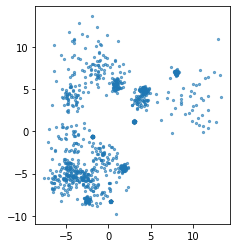

In [8]:
rng = np.random.RandomState(3)
X, y = make_blobs(n_samples=1000, centers=20, random_state=rng, cluster_std=[rng.gamma(1) for i in range(20)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

In [9]:
km = KMeans(n_clusters=15)
km.fit(X)
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = km.predict(np.c_[xx.ravel(), yy.ravel()])

([], <a list of 0 Text major ticklabel objects>)

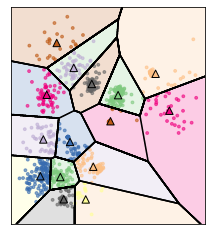

In [10]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, pred.reshape(xx.shape), alpha=.2, cmap='Accent', levels=np.arange(15 + 1))
plt.contour(xx, yy, pred.reshape(xx.shape), colors='k', levels=np.arange(15 + 1))
plt.scatter(X[:, 0], X[:, 1], s=8, alpha=.6, c=km.labels_, cmap='Accent')
centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], s=55, cmap='Accent', marker="^", c=range(km.n_clusters), edgecolor='k')

plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

# Agglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import itertools

ari_min = 3
# find a random state that makes them most dissimilar ... just for illustration
for i in range(1000):
    labels = []
    for linkage in ["complete", "average", 'ward']:
        agg = AgglomerativeClustering(n_clusters=5, linkage=linkage)
        rng = np.random.RandomState(i)
        X, y = make_blobs(n_samples=100, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])
        labels.append(agg.fit_predict(X))
        
    ari = 0
    for j, k in itertools.combinations(labels, 2):
        ari += adjusted_rand_score(j, k)
    if ari_min > ari:
        ari_min = ari
        print(i, ari)

0 1.0085065985512043
7 0.999090616692345
85 0.818683326528442
325 0.7794265903808125
484 0.5518711454498323


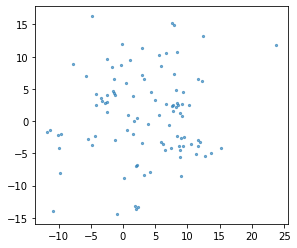

In [12]:
rng = np.random.RandomState(325)
X, y = make_blobs(n_samples=100, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()

single : [96  1  1  1  1]
average : [82  9  7  1  1]
complete : [50 24 14 11  1]
ward : [31 30 20 10  9]


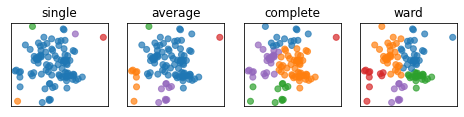

In [14]:
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 4, figsize=(8, 3), subplot_kw={"xticks":(), "yticks": ()})
for ax, linkage in zip(axes, ['single', "average", "complete", 'ward']):
    agg = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    agg.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(agg.labels_), alpha=.7)
    ax.set_title(linkage)
    ax.set_aspect("equal")
    print("{} : {}".format(linkage, np.sort(np.bincount(agg.labels_))[::-1]))

# DBSCAN

min_samples: 4 eps: 2.500000  cluster: [-1 -1  0  0  0  0  0  1 -1  2  0  0  0  2  0  1  0  0  2  2  3  0  0  2
  0 -1  0 -1 -1  0  2  2  0 -1  0  4  0  2  2  0  2  2 -1  0 -1  4  3  2
  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  3  1  4 -1 -1  2  2  3
 -1  2  0  0 -1  0 -1 -1  3 -1  2 -1  0  4  0  0 -1  0  1 -1  2  0  0  2
 -1  0 -1  0]


([], <a list of 0 Text major ticklabel objects>)

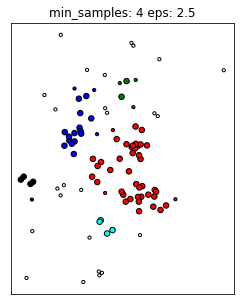

In [15]:
from sklearn.cluster import DBSCAN

min_samples = 4
eps = 2.5
plt.figure(figsize=(4, 5))
dbscan = DBSCAN(min_samples=min_samples, eps=eps)
colors = ['r', 'g', 'b', 'k', 'cyan']
markers = ['o', '^', 'v']
# get cluster assignments
clusters = dbscan.fit_predict(X)
print("min_samples: %d eps: %f  cluster: %s"
      % (min_samples, eps, clusters))
if np.any(clusters == -1):
    c = ['w'] + colors
    clusters = clusters + 1
else:
    c = colors
    m = markers
c = np.array(c)
plt.scatter(X[:, 0], X[:, 1], c=c[clusters], s=10, edgecolor="k")
inds = dbscan.core_sample_indices_
# vizualize core samples and clusters.
if len(inds):
    plt.scatter(X[inds, 0], X[inds, 1], c=c[clusters[inds]],
                     s=30, edgecolor="k")
plt.title("min_samples: %d eps: %.1f"
                     % (min_samples, eps))
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

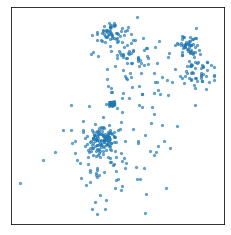

In [16]:
rng = np.random.RandomState(3)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()
plt.xticks(())
plt.yticks(())

In [17]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
print(gmm.means_)
print(gmm.covariances_)

[[-2.286 -4.674]
 [ 8.685  5.206]
 [-0.377  6.947]]
[[[ 6.651  2.066]
  [ 2.066 13.759]]

 [[ 1.481 -1.1  ]
  [-1.1    4.191]]

 [[ 5.467 -3.341]
  [-3.341  4.666]]]


([], <a list of 0 Text major ticklabel objects>)

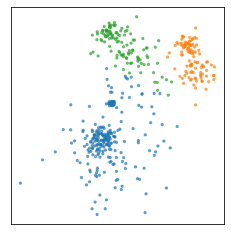

In [18]:
assignment = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())

In [19]:
# log probability under the model
print(gmm.score(X))
print(gmm.score_samples(X).shape)

-5.508383131660926
(500,)


In [20]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = gmm.predict_proba(np.c_[xx.ravel(), yy.ravel()])

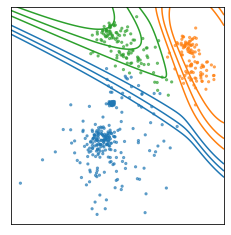

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
levels = [.9, .99, .999, 1]

for color, component in zip(range(3), pred.T):
    plt.contour(xx, yy, component.reshape(xx.shape), colors=[plt.cm.tab10(color)], levels=levels)

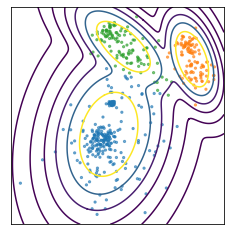

In [22]:
scores = gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(assignment))
plt.gca().set_aspect("equal")
plt.xticks(())
plt.yticks(())
scores = np.exp(scores)
plt.contour(xx, yy, scores.reshape(xx.shape), levels=np.percentile(scores, np.linspace(0, 100, 8))[1:-1])

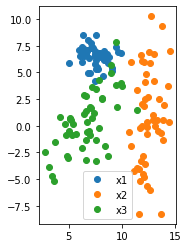

In [23]:
rnd = np.random.RandomState(4)

X1 = rnd.normal(size=(50, 2)) + rnd.normal(scale=10, size=(1, 2))
X2 = rnd.normal(scale=(1, 5), size=(50, 2)) + rnd.normal(scale=(10, 1), size=(1, 2))
X3 = np.dot(rnd.normal(scale=(1, 2), size=(50, 2)), [[1, -1], [1, 1]]) + rnd.normal(scale=(10, 1), size=(1, 2))

plt.plot(X1[:, 0], X1[:, 1], 'o', label='x1')
plt.plot(X2[:, 0], X2[:, 1], 'o', label='x2')
plt.plot(X3[:, 0], X3[:, 1], 'o', label='x3')
plt.gca().set_aspect("equal")
plt.legend()

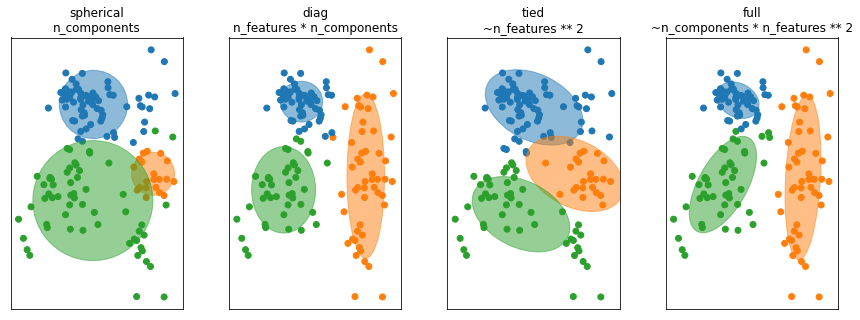

In [24]:


import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

from sklearn.mixture import GaussianMixture

def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n], v[0], v[1],
                                  180 + angle, color=plt.cm.tab10(n))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

rnd = np.random.RandomState(4)

X1 = rnd.normal(size=(50, 2)) + rnd.normal(scale=10, size=(1, 2))
X2 = rnd.normal(scale=(1, 5), size=(50, 2)) + rnd.normal(scale=(10, 1), size=(1, 2))
X3 = np.dot(rnd.normal(scale=(1, 2), size=(50, 2)), [[1, -1], [1, 1]]) + rnd.normal(scale=(10, 1), size=(1, 2))

X = np.vstack([X1, X2, X3])

# Try GMMs using different types of covariances.
estimators = [GaussianMixture(n_components=3, covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']]

n_estimators = len(estimators)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ("spherical\nn_components", "diag\nn_features * n_components",
          "tied\n~n_features ** 2", "full\n~n_components * n_features ** 2")

for ax, title, estimator in zip(axes, titles, estimators):
    estimator.fit(X)

    make_ellipses(estimator, ax)

    pred = estimator.predict(X)    
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.tab10(pred))

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_aspect("equal")

# GMM vs KMeans

In [25]:
n_samples = 500
blobs = make_blobs(n_samples=n_samples, random_state=8)


# Anisotropicly distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

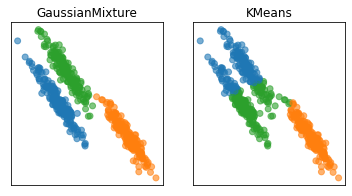

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for ax, model in zip(axes, [GaussianMixture(n_components=3), KMeans(n_clusters=3)]):
    model.fit(X_aniso)
    ax.scatter(X_aniso[:, 0], X_aniso[:, 1], c=plt.cm.tab10(model.predict(X_aniso)), alpha=.6)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(type(model).__name__)

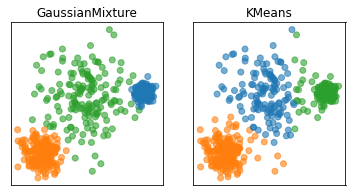

In [27]:
X_varied = varied[0]
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for ax, model in zip(axes, [GaussianMixture(n_components=3), KMeans(n_clusters=3)]):
    model.fit(X_varied)
    ax.scatter(X_varied[:, 0], X_varied[:, 1], c=plt.cm.tab10(model.predict(X_varied)), alpha=.6)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(type(model).__name__)

In [28]:
from scipy import stats
line = np.linspace(-8, 6, 200)
norm1 = stats.norm(0, 1)
norm2 = stats.norm(3, 2)
norm3 = stats.norm(-3.4, .5)

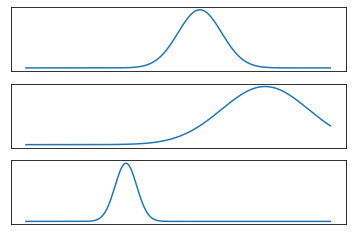

In [29]:
fig, axes = plt.subplots(3, subplot_kw={'xticks': (), 'yticks': ()})
axes[0].plot(line, norm1.pdf(line))
axes[1].plot(line, norm2.pdf(line))
axes[2].plot(line, norm3.pdf(line))

([], <a list of 0 Text major ticklabel objects>)

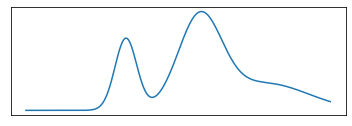

In [30]:
plt.figure(figsize=(6, 2))
plt.plot(line, .5 * norm1.pdf(line) + .3 * norm2.pdf(line) + .2 * norm3.pdf(line))
plt.xticks(())
plt.yticks(())

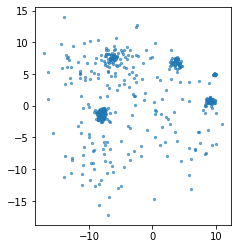

In [31]:
rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(1.5) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()
ylim = plt.ylim()